In [13]:
# Crop Yield Prediction System
# Comprehensive analysis and machine learning model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

print("✅ Crop Yield Prediction System Initialized")

✅ Crop Yield Prediction System Initialized


In [14]:
# Step 1: Load and Explore the Data
print("📊 Loading and Exploring Dataset...")

# Load the dataset
df = pd.read_csv('crop_yield.csv')

# Basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nDataset Info:")
df.info()

print("\nBasic Statistics:")
display(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

📊 Loading and Exploring Dataset...
Dataset Shape: (1000000, 10)

First 5 rows:


,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB

Basic Statistics:


,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372



Missing Values:
Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64


📈 Data Visualization and Analysis...


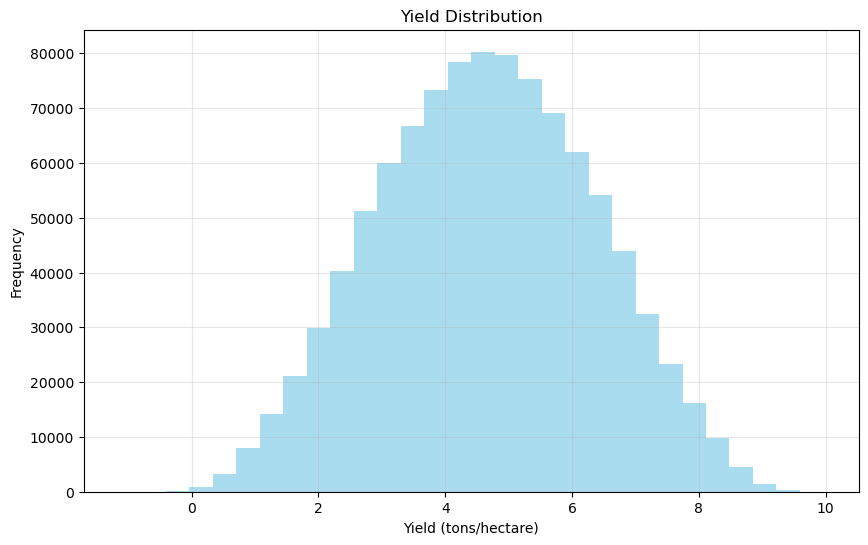

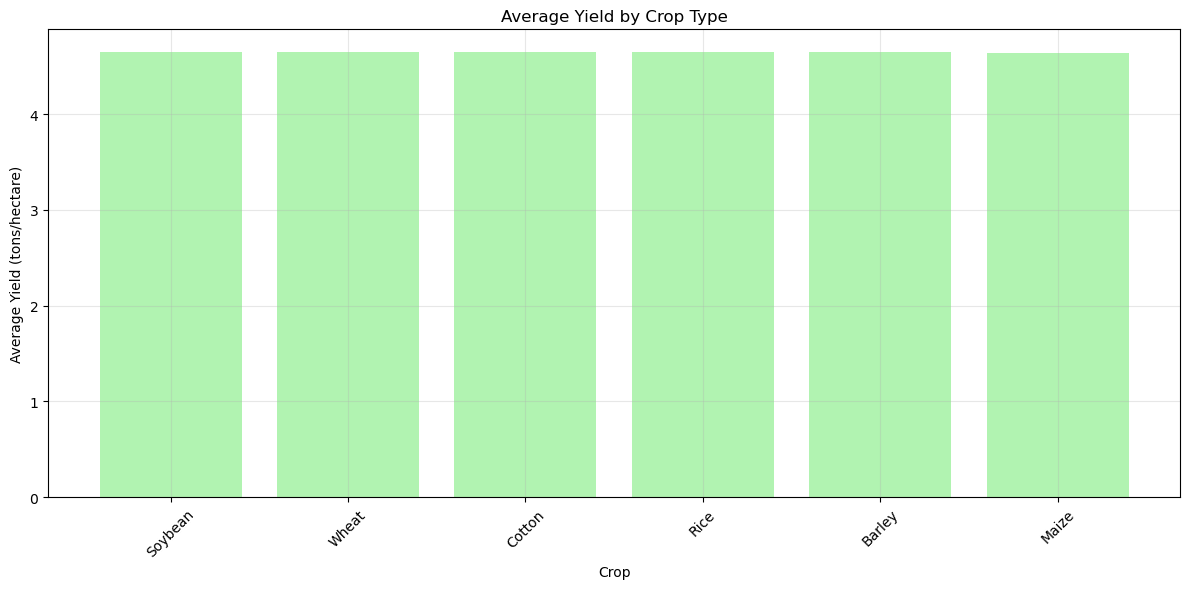

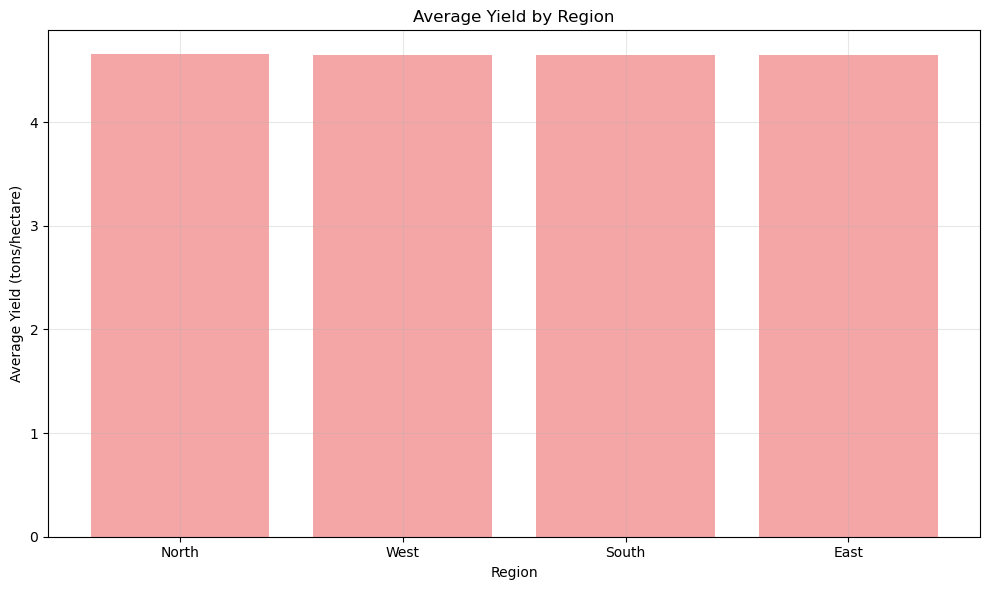

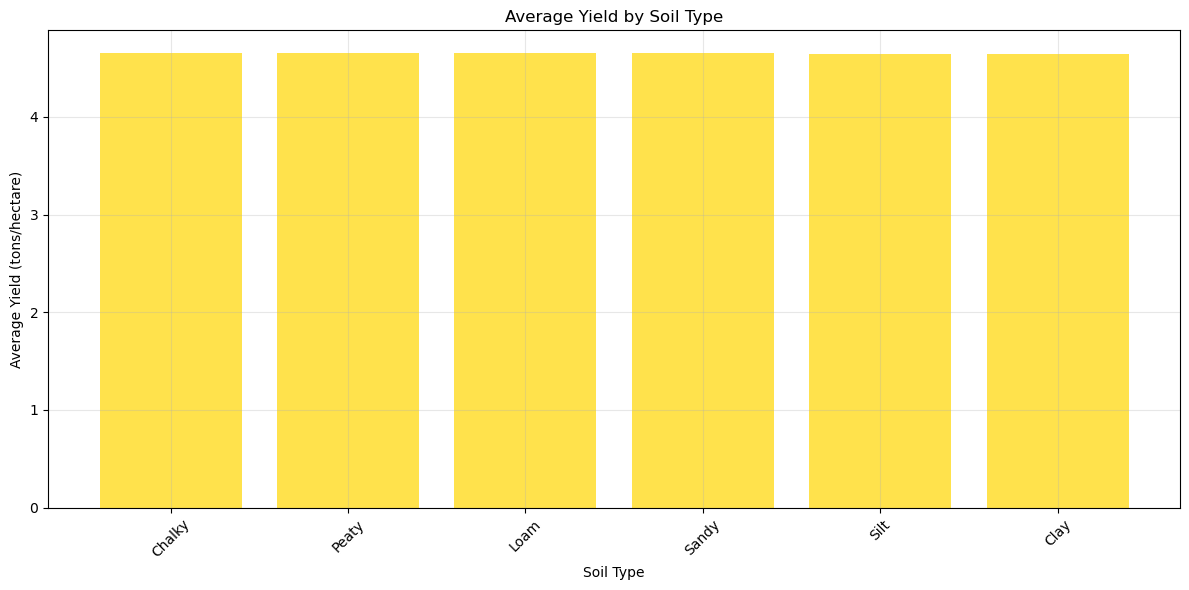

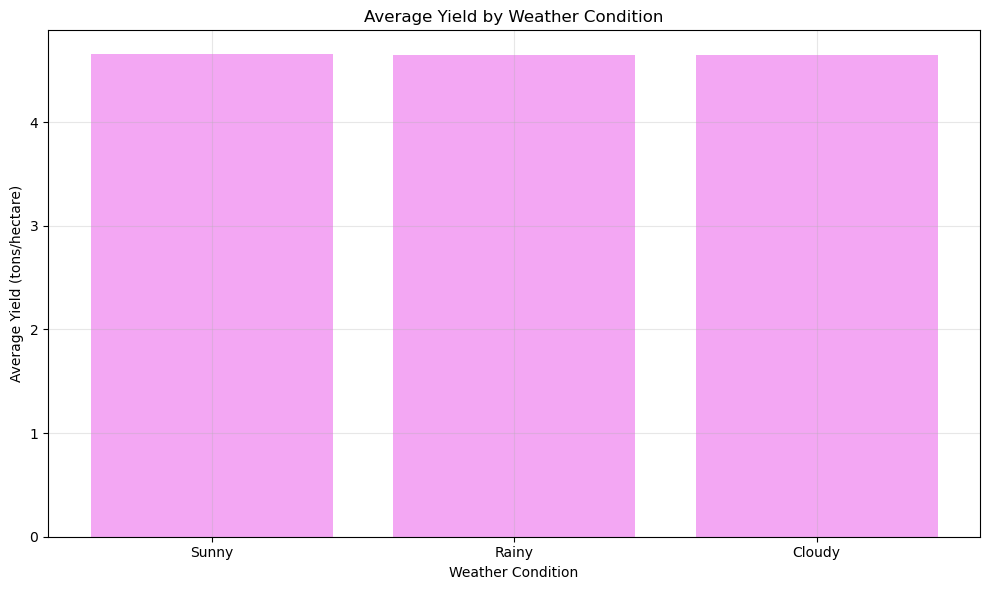

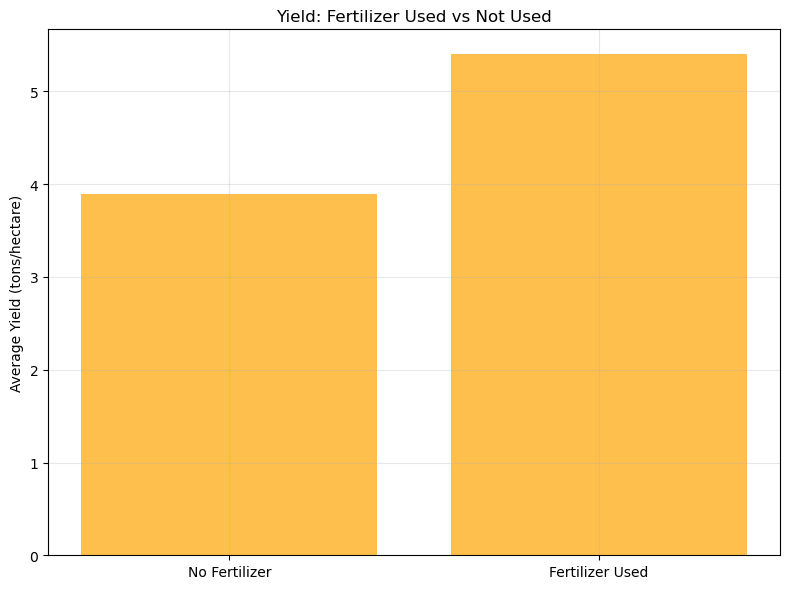

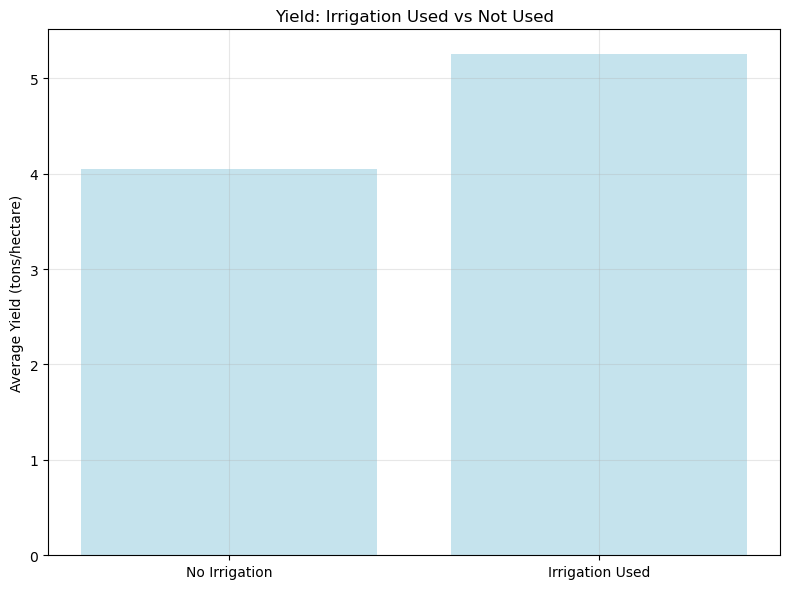

In [20]:
# Step 2: Data Visualization and Analysis
print("📈 Data Visualization and Analysis...")

# Create individual plots instead of subplots to avoid compatibility issues

# 1. Yield distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Yield_tons_per_hectare'], bins=30, alpha=0.7, color='skyblue')
plt.title('Yield Distribution')
plt.xlabel('Yield (tons/hectare)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# 2. Crop-wise yield
plt.figure(figsize=(12, 6))
crop_yield = df.groupby('Crop')['Yield_tons_per_hectare'].mean().sort_values(ascending=False)
plt.bar(crop_yield.index, crop_yield.values, color='lightgreen', alpha=0.7)
plt.title('Average Yield by Crop Type')
plt.xlabel('Crop')
plt.ylabel('Average Yield (tons/hectare)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Region-wise yield
plt.figure(figsize=(10, 6))
region_yield = df.groupby('Region')['Yield_tons_per_hectare'].mean().sort_values(ascending=False)
plt.bar(region_yield.index, region_yield.values, color='lightcoral', alpha=0.7)
plt.title('Average Yield by Region')
plt.xlabel('Region')
plt.ylabel('Average Yield (tons/hectare)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Soil type yield
plt.figure(figsize=(12, 6))
soil_yield = df.groupby('Soil_Type')['Yield_tons_per_hectare'].mean().sort_values(ascending=False)
plt.bar(soil_yield.index, soil_yield.values, color='gold', alpha=0.7)
plt.title('Average Yield by Soil Type')
plt.xlabel('Soil Type')
plt.ylabel('Average Yield (tons/hectare)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Weather condition yield
plt.figure(figsize=(10, 6))
weather_yield = df.groupby('Weather_Condition')['Yield_tons_per_hectare'].mean().sort_values(ascending=False)
plt.bar(weather_yield.index, weather_yield.values, color='violet', alpha=0.7)
plt.title('Average Yield by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Yield (tons/hectare)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 6. Fertilizer usage impact
plt.figure(figsize=(8, 6))
fert_yield = df.groupby('Fertilizer_Used')['Yield_tons_per_hectare'].mean()
labels = ['No Fertilizer', 'Fertilizer Used']
plt.bar(labels, fert_yield.values, color='orange', alpha=0.7)
plt.title('Yield: Fertilizer Used vs Not Used')
plt.ylabel('Average Yield (tons/hectare)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 7. Irrigation usage impact
plt.figure(figsize=(8, 6))
irrig_yield = df.groupby('Irrigation_Used')['Yield_tons_per_hectare'].mean()
labels = ['No Irrigation', 'Irrigation Used']
plt.bar(labels, irrig_yield.values, color='lightblue', alpha=0.7)
plt.title('Yield: Irrigation Used vs Not Used')
plt.ylabel('Average Yield (tons/hectare)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

🔍 Correlation Analysis...


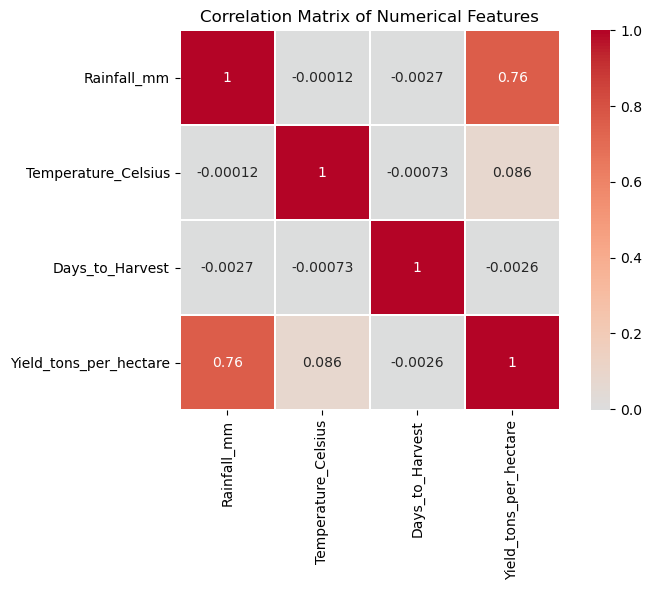

Correlation with Yield:
Yield_tons_per_hectare    1.000000
Rainfall_mm               0.764618
Temperature_Celsius       0.085565
Days_to_Harvest          -0.002591
Name: Yield_tons_per_hectare, dtype: float64


In [21]:
# Step 3: Correlation Analysis
print("🔍 Correlation Analysis...")

# Select numerical columns for correlation
numerical_cols = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest', 'Yield_tons_per_hectare']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
           square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

print("Correlation with Yield:")
yield_corr = correlation_matrix['Yield_tons_per_hectare'].sort_values(ascending=False)
print(yield_corr)

In [22]:
# Step 4: Feature Engineering and Preprocessing
print("⚙️ Feature Engineering and Preprocessing...")

# Create a copy for preprocessing
df_processed = df.copy()

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']

for col in categorical_columns:
    le = LabelEncoder()
    df_processed[col + '_encoded'] = le.fit_transform(df_processed[col])
    label_encoders[col] = le

# Convert boolean to int
df_processed['Fertilizer_Used'] = df_processed['Fertilizer_Used'].astype(int)
df_processed['Irrigation_Used'] = df_processed['Irrigation_Used'].astype(int)

# Prepare features and target
feature_columns = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest', 
                  'Fertilizer_Used', 'Irrigation_Used'] + [col + '_encoded' for col in categorical_columns]

X = df_processed[feature_columns]
y = df_processed['Yield_tons_per_hectare']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature columns: {feature_columns}")

⚙️ Feature Engineering and Preprocessing...
Features shape: (1000000, 9)
Target shape: (1000000,)
Feature columns: ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest', 'Fertilizer_Used', 'Irrigation_Used', 'Region_encoded', 'Soil_Type_encoded', 'Crop_encoded', 'Weather_Condition_encoded']


In [23]:
# Step 5: Train-Test Split and Scaling
print("📊 Splitting Data and Scaling Features...")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data preprocessing completed!")

📊 Splitting Data and Scaling Features...
Training set: 800000 samples
Testing set: 200000 samples
✅ Data preprocessing completed!


In [24]:
# Step 6: Model Training and Evaluation
print("🤖 Training Multiple Models...")

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train model
    if name in ['Linear Regression', 'Ridge Regression']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'predictions': y_pred
    }
    
    print(f"{name} Results:")
    print(f"  MAE: {mae:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R² Score: {r2:.4f}")

🤖 Training Multiple Models...

Training Random Forest...
Random Forest Results:
  MAE: 0.4123
  RMSE: 0.5167
  R² Score: 0.9074

Training Gradient Boosting...
Gradient Boosting Results:
  MAE: 0.4009
  RMSE: 0.5024
  R² Score: 0.9125

Training Linear Regression...
Linear Regression Results:
  MAE: 0.3996
  RMSE: 0.5008
  R² Score: 0.9130

Training Ridge Regression...
Ridge Regression Results:
  MAE: 0.3996
  RMSE: 0.5008
  R² Score: 0.9130


📊 Model Comparison...


,Model,MAE,RMSE,R2_Score
2,Linear Regression,0.399552,0.500771,0.913015
3,Ridge Regression,0.399552,0.500771,0.913015
1,Gradient Boosting,0.400855,0.502383,0.912454
0,Random Forest,0.412285,0.516704,0.907392


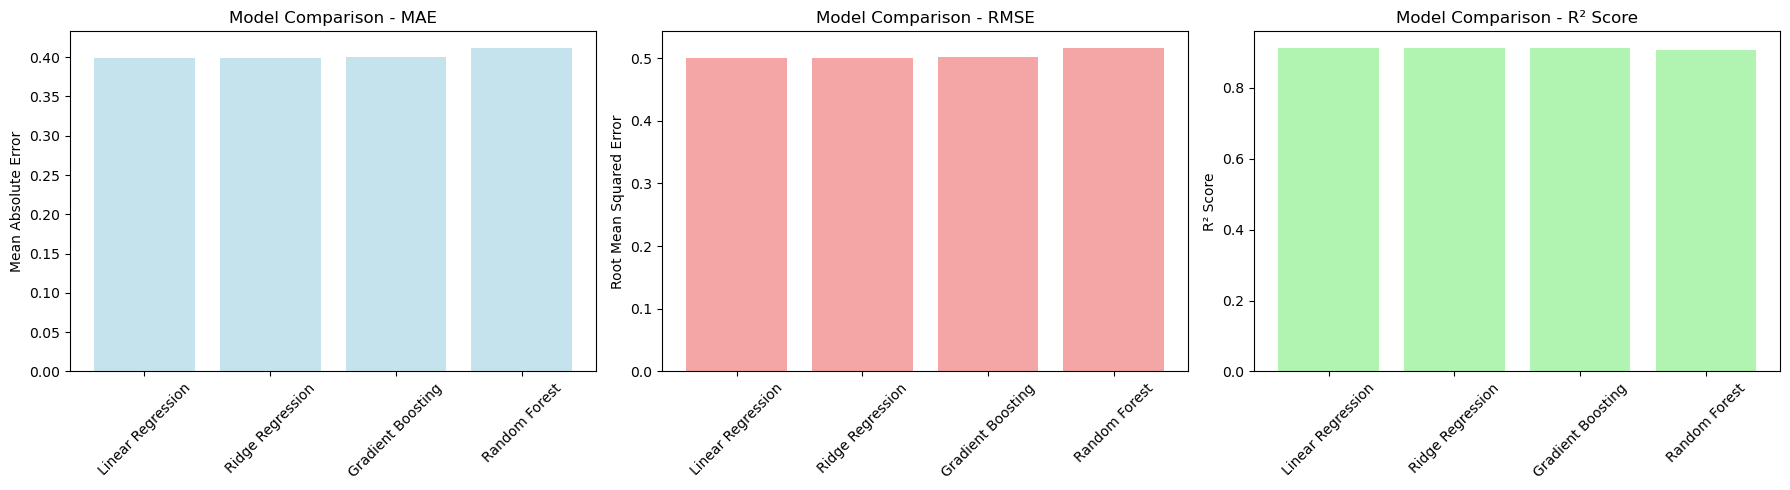

In [25]:
# Step 7: Model Comparison
print("📊 Model Comparison...")

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'MAE': [results[model]['MAE'] for model in results],
    'RMSE': [results[model]['RMSE'] for model in results],
    'R2_Score': [results[model]['R2'] for model in results]
}).sort_values('R2_Score', ascending=False)

display(comparison_df)

# Visualize model performance with individual plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# MAE comparison
bars1 = ax1.bar(comparison_df['Model'], comparison_df['MAE'], color='lightblue', alpha=0.7)
ax1.set_title('Model Comparison - MAE')
ax1.set_ylabel('Mean Absolute Error')
ax1.set_xticklabels(comparison_df['Model'], rotation=45)

# RMSE comparison
bars2 = ax2.bar(comparison_df['Model'], comparison_df['RMSE'], color='lightcoral', alpha=0.7)
ax2.set_title('Model Comparison - RMSE')
ax2.set_ylabel('Root Mean Squared Error')
ax2.set_xticklabels(comparison_df['Model'], rotation=45)

# R² comparison
bars3 = ax3.bar(comparison_df['Model'], comparison_df['R2_Score'], color='lightgreen', alpha=0.7)
ax3.set_title('Model Comparison - R² Score')
ax3.set_ylabel('R² Score')
ax3.set_xticklabels(comparison_df['Model'], rotation=45)

plt.tight_layout()
plt.show()

🏆 Best Model Analysis...
Best Model: Linear Regression
R² Score: 0.9130
RMSE: 0.5008


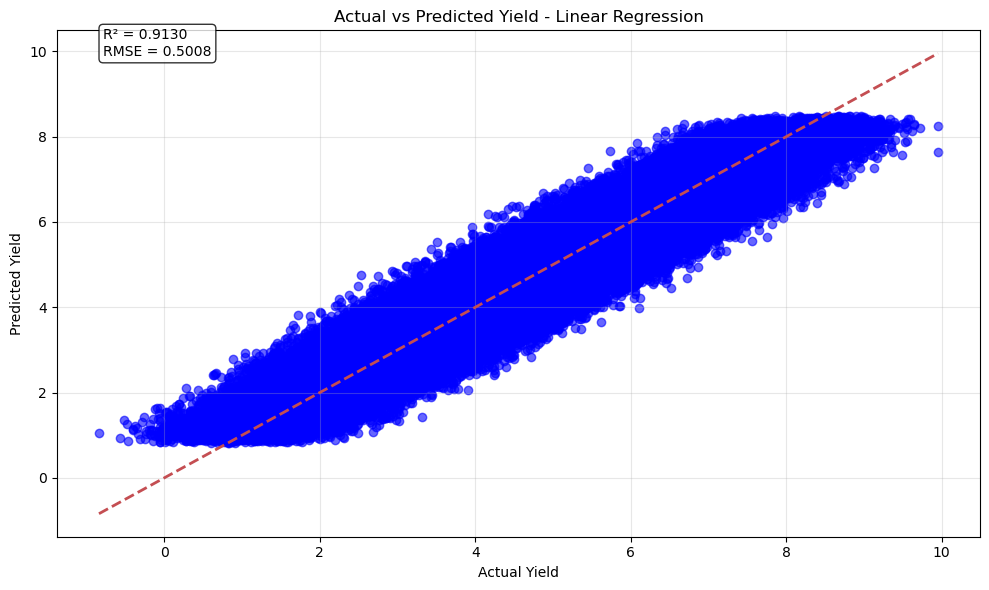

In [26]:
# Step 8: Best Model Analysis
print("🏆 Best Model Analysis...")

best_model_name = comparison_df.iloc[0]['Model']
best_model_results = results[best_model_name]

print(f"Best Model: {best_model_name}")
print(f"R² Score: {best_model_results['R2']:.4f}")
print(f"RMSE: {best_model_results['RMSE']:.4f}")

# Plot actual vs predicted for best model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_model_results['predictions'], alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title(f'Actual vs Predicted Yield - {best_model_name}')
plt.grid(True, alpha=0.3)

# Add metrics to plot
plt.text(0.05, 0.95, f'R² = {best_model_results["R2"]:.4f}\nRMSE = {best_model_results["RMSE"]:.4f}', 
         transform=plt.gca().transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

In [27]:
# Step 9: Feature Importance Analysis
print("🔍 Feature Importance Analysis...")

if best_model_name in ['Random Forest', 'Gradient Boosting']:
    best_model = models[best_model_name]
    feature_importance = pd.DataFrame({
        'feature': feature_columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
    plt.title(f'Top 10 Feature Importance - {best_model_name}')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()
    
    print("Top 10 Most Important Features:")
    display(feature_importance.head(10))
else:
    print("Feature importance not available for linear models with these features.")

🔍 Feature Importance Analysis...
Feature importance not available for linear models with these features.


In [28]:
# Step 10: Prediction Function
print("🔮 Creating Prediction Function...")

def predict_crop_yield(region, soil_type, crop, rainfall, temperature, 
                      fertilizer_used, irrigation_used, weather_condition, days_to_harvest):
    """
    Predict crop yield based on input parameters
    """
    # Create input dataframe
    input_data = pd.DataFrame({
        'Region': [region],
        'Soil_Type': [soil_type],
        'Crop': [crop],
        'Rainfall_mm': [rainfall],
        'Temperature_Celsius': [temperature],
        'Fertilizer_Used': [1 if fertilizer_used else 0],
        'Irrigation_Used': [1 if irrigation_used else 0],
        'Weather_Condition': [weather_condition],
        'Days_to_Harvest': [days_to_harvest]
    })
    
    # Preprocess the input
    input_processed = input_data.copy()
    
    # Encode categorical variables
    for col in categorical_columns:
        le = label_encoders[col]
        input_processed[col + '_encoded'] = le.transform(input_processed[col])
    
    # Prepare features
    X_input = input_processed[feature_columns]
    
    # Make prediction
    if best_model_name in ['Linear Regression', 'Ridge Regression']:
        X_input_scaled = scaler.transform(X_input)
        prediction = models[best_model_name].predict(X_input_scaled)[0]
    else:
        prediction = models[best_model_name].predict(X_input)[0]
    
    return prediction

# Test the prediction function
print("🧪 Testing Prediction Function...")

test_prediction = predict_crop_yield(
    region='North',
    soil_type='Loam',
    crop='Wheat',
    rainfall=600,
    temperature=25,
    fertilizer_used=True,
    irrigation_used=True,
    weather_condition='Sunny',
    days_to_harvest=120
)

print(f"Predicted Yield: {test_prediction:.2f} tons per hectare")

🔮 Creating Prediction Function...
🧪 Testing Prediction Function...
Predicted Yield: 6.20 tons per hectare


🌾 Crop-specific Analysis...


,Crop,Count,Avg_Yield,Avg_Rainfall,Avg_Temperature,Avg_Days_to_Harvest,Fertilizer_Usage_Rate,Irrigation_Usage_Rate
3,Soybean,166349,4.653712,550.474299,27.509328,104.455945,0.499781,0.500778
4,Wheat,166673,4.652740,550.248678,27.515932,104.514900,0.501155,0.500807
0,Cotton,166585,4.650841,549.903414,27.527394,104.533800,0.500609,0.499511
1,Rice,166792,4.650760,550.510286,27.498745,104.500875,0.500384,0.496391
2,Barley,166777,4.647412,549.561147,27.500890,104.425646,0.499259,0.499505
5,Maize,166824,4.641387,549.195094,27.477555,104.538927,0.498453,0.499958


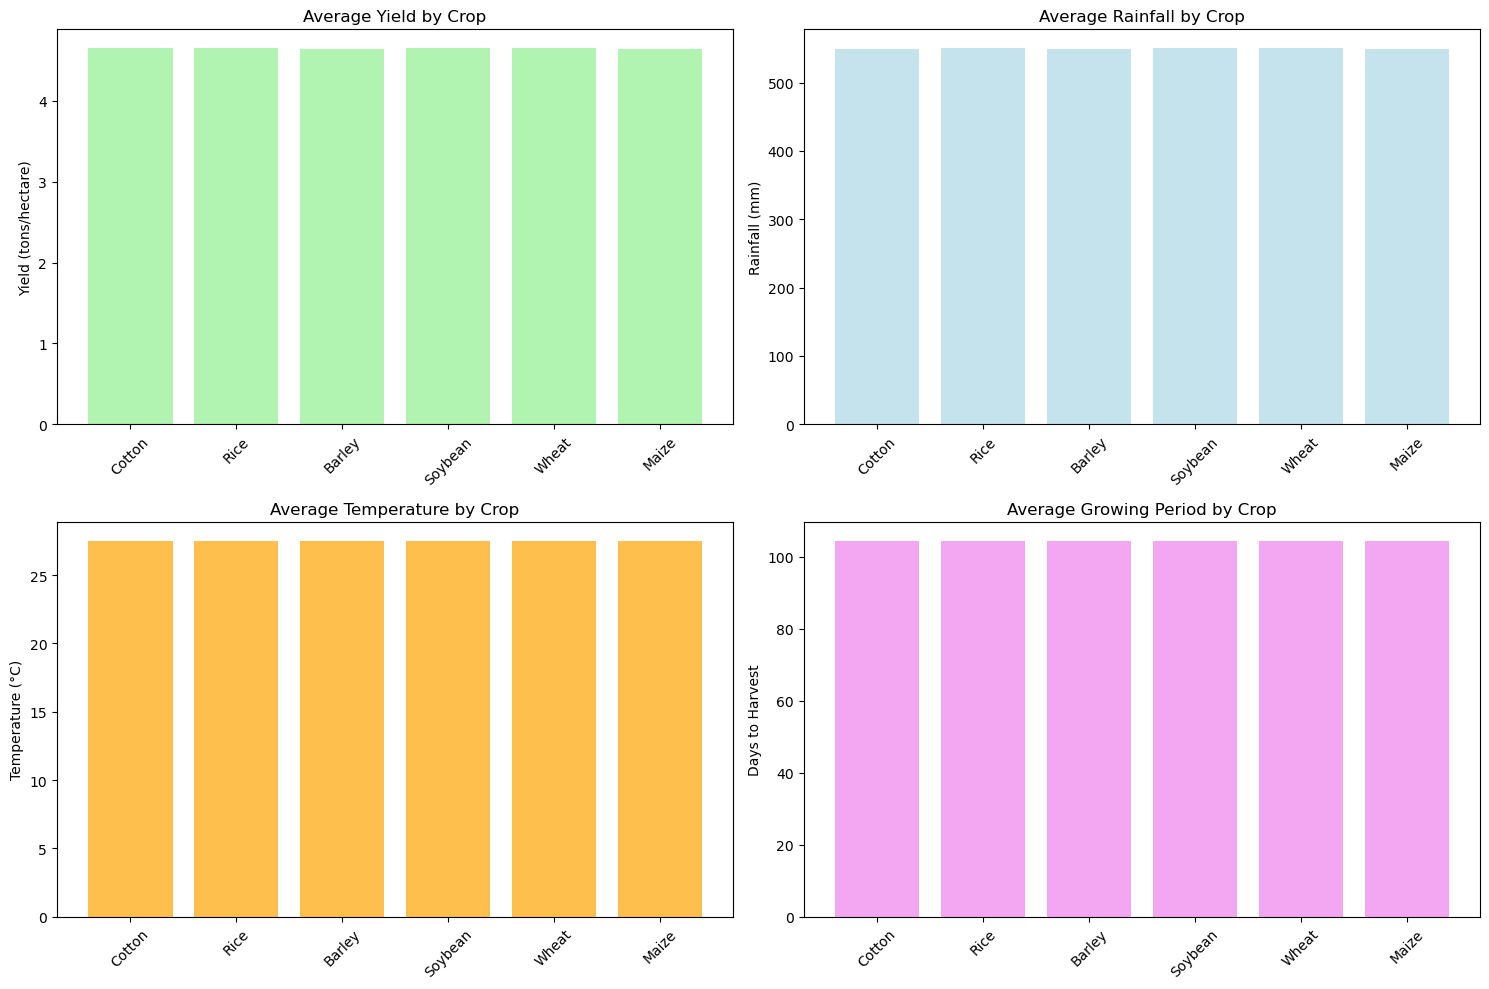

In [29]:
# Step 11: Advanced Analysis - Crop-specific Insights
print("🌾 Crop-specific Analysis...")

# Analyze each crop separately
crops = df['Crop'].unique()
crop_insights = []

for crop in crops:
    crop_data = df[df['Crop'] == crop]
    
    insights = {
        'Crop': crop,
        'Count': len(crop_data),
        'Avg_Yield': crop_data['Yield_tons_per_hectare'].mean(),
        'Avg_Rainfall': crop_data['Rainfall_mm'].mean(),
        'Avg_Temperature': crop_data['Temperature_Celsius'].mean(),
        'Avg_Days_to_Harvest': crop_data['Days_to_Harvest'].mean(),
        'Fertilizer_Usage_Rate': crop_data['Fertilizer_Used'].mean(),
        'Irrigation_Usage_Rate': crop_data['Irrigation_Used'].mean()
    }
    crop_insights.append(insights)

crop_insights_df = pd.DataFrame(crop_insights)
display(crop_insights_df.sort_values('Avg_Yield', ascending=False))

# Visualize crop requirements with individual plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Yield by crop
bars1 = ax1.bar(crop_insights_df['Crop'], crop_insights_df['Avg_Yield'], color='lightgreen', alpha=0.7)
ax1.set_title('Average Yield by Crop')
ax1.set_ylabel('Yield (tons/hectare)')
ax1.set_xticklabels(crop_insights_df['Crop'], rotation=45)

# Rainfall requirements
bars2 = ax2.bar(crop_insights_df['Crop'], crop_insights_df['Avg_Rainfall'], color='lightblue', alpha=0.7)
ax2.set_title('Average Rainfall by Crop')
ax2.set_ylabel('Rainfall (mm)')
ax2.set_xticklabels(crop_insights_df['Crop'], rotation=45)

# Temperature preferences
bars3 = ax3.bar(crop_insights_df['Crop'], crop_insights_df['Avg_Temperature'], color='orange', alpha=0.7)
ax3.set_title('Average Temperature by Crop')
ax3.set_ylabel('Temperature (°C)')
ax3.set_xticklabels(crop_insights_df['Crop'], rotation=45)

# Growing period
bars4 = ax4.bar(crop_insights_df['Crop'], crop_insights_df['Avg_Days_to_Harvest'], color='violet', alpha=0.7)
ax4.set_title('Average Growing Period by Crop')
ax4.set_ylabel('Days to Harvest')
ax4.set_xticklabels(crop_insights_df['Crop'], rotation=45)

plt.tight_layout()
plt.show()

In [30]:
# Step 12: Summary and Recommendations
print("📋 Summary and Recommendations")

print("\n" + "="*50)
print("CROP YIELD PREDICTION SYSTEM SUMMARY")
print("="*50)

print(f"\n📊 Dataset Overview:")
print(f"   • Total records: {len(df):,}")
print(f"   • Crops: {', '.join(df['Crop'].unique())}")
print(f"   • Regions: {', '.join(df['Region'].unique())}")
print(f"   • Soil types: {', '.join(df['Soil_Type'].unique())}")

print(f"\n🤖 Model Performance Summary:")
print(f"   • Best Model: {best_model_name}")
print(f"   • R² Score: {best_model_results['R2']:.4f}")
print(f"   • Prediction Error (RMSE): {best_model_results['RMSE']:.4f} tons/hectare")

print(f"\n🌱 Key Insights:")
print(f"   • Highest yielding crop: {crop_insights_df.loc[crop_insights_df['Avg_Yield'].idxmax(), 'Crop']}")
print(f"   • Most fertilizer used by: {crop_insights_df.loc[crop_insights_df['Fertilizer_Usage_Rate'].idxmax(), 'Crop']}")
print(f"   • Longest growing period: {crop_insights_df.loc[crop_insights_df['Avg_Days_to_Harvest'].idxmax(), 'Crop']}")

print(f"\n💡 Recommendations:")
print("   1. Use the prediction function to estimate yields for different scenarios")
print("   2. Consider soil-specific and region-specific optimizations")
print("   3. Monitor weather conditions and adjust irrigation accordingly")
print("   4. Optimize fertilizer usage based on crop requirements")

print(f"\n🎯 Next Steps:")
print("   • Collect more data for improved accuracy")
print("   • Experiment with different feature combinations")
print("   • Consider time-series analysis for seasonal patterns")
print("   • Implement real-time monitoring and prediction")

print("\n" + "="*50)

📋 Summary and Recommendations

CROP YIELD PREDICTION SYSTEM SUMMARY

📊 Dataset Overview:
   • Total records: 1,000,000
   • Crops: Cotton, Rice, Barley, Soybean, Wheat, Maize
   • Regions: West, South, North, East
   • Soil types: Sandy, Clay, Loam, Silt, Peaty, Chalky

🤖 Model Performance Summary:
   • Best Model: Linear Regression
   • R² Score: 0.9130
   • Prediction Error (RMSE): 0.5008 tons/hectare

🌱 Key Insights:
   • Highest yielding crop: Soybean
   • Most fertilizer used by: Wheat
   • Longest growing period: Maize

💡 Recommendations:
   1. Use the prediction function to estimate yields for different scenarios
   2. Consider soil-specific and region-specific optimizations
   3. Monitor weather conditions and adjust irrigation accordingly
   4. Optimize fertilizer usage based on crop requirements

🎯 Next Steps:
   • Collect more data for improved accuracy
   • Experiment with different feature combinations
   • Consider time-series analysis for seasonal patterns
   • Implement